#Лабораторна робота №3

*Завдання* №1

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)
df = pd.DataFrame(diabetes_X, columns=load_diabetes().feature_names)
df['target'] = diabetes_y

#Вивести перших 5 рядків
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
#Перевірити наявність пропусків. У разі виявлення замінити на середнє значення.
df.isnull().sum()
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [ ]:
# Перевірити наявність дублікатів, при виявленні – видалити
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)


0


In [ ]:
# Замінити бінарні ознаки. У стовпчику «Вік» спочатку перевірте унікальні значення.
print(df['age'].unique())

[ 0.03807591 -0.00188202  0.08529891 -0.08906294  0.00538306 -0.09269548
 -0.04547248  0.06350368  0.04170844 -0.07090025 -0.09632802  0.02717829
  0.01628068  0.04534098 -0.05273755 -0.00551455  0.07076875 -0.0382074
 -0.02730979 -0.04910502 -0.0854304  -0.06363517 -0.06726771 -0.10722563
 -0.02367725  0.05260606  0.06713621 -0.06000263  0.03444337  0.03081083
  0.04897352  0.01264814 -0.00914709 -0.09996055  0.01991321 -0.05637009
 -0.07816532 -0.04183994  0.05987114 -0.03457486 -0.03094232 -0.10359309
 -0.01641217  0.00175052 -0.02004471  0.0562386   0.02354575  0.0090156
 -0.07453279 -0.01277963 -0.08179786  0.08166637  0.11072668  0.09256398
  0.07440129  0.07803383  0.09619652  0.08893144]


In [ ]:
# Перевірити тип даних. При необхідності замінити тип даних на числовий.
df.dtypes

,0
age,float64
sex,float64
bmi,float64
bp,float64
s1,float64
s2,float64
s3,float64
s4,float64
s5,float64
s6,float64


target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


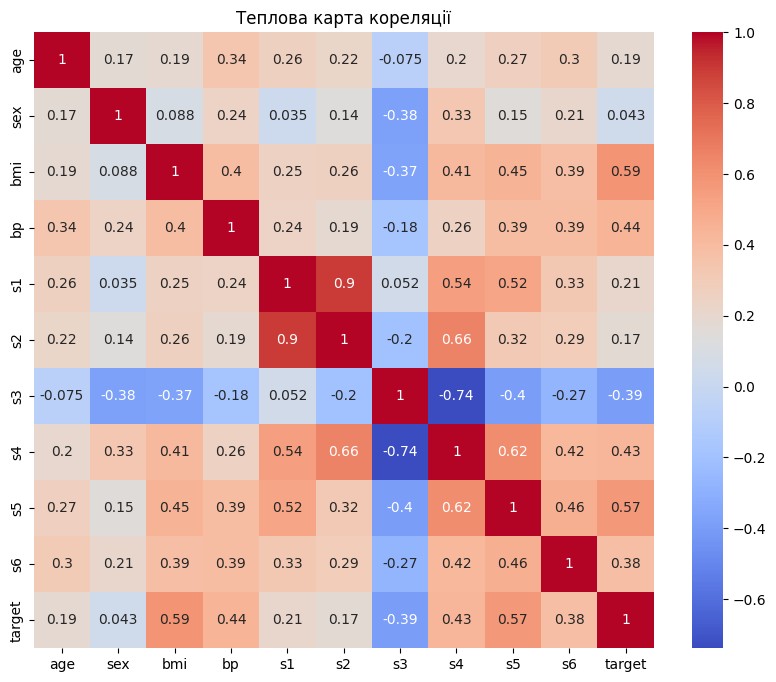

In [ ]:
#Обчислити кореляцію між прогресом діабету і іншими ознаками. Розташувати в порядку спадання. Побудувати теплову карту кореляції.
correlations = df.corr()['target'].sort_values(ascending=False)
print(correlations)

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Теплова карта кореляції')
plt.show()

In [ ]:
#Поділити дані на тренувальну і тестову вибірки.
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)
print("\nТренувальні мітки:")
print(y_train.head())

# Виведення тестових міток
print("\nТестові мітки:")
print(y_test.head())


Тренувальні мітки:
17     144.0
66     150.0
137    280.0
245    125.0
31      59.0
Name: target, dtype: float64

Тестові мітки:
287    219.0
211     70.0
72     202.0
321    230.0
73     111.0
Name: target, dtype: float64


In [ ]:
#Масштабувати ознаки.
scaler = StandardScaler()

# Підгонка на тренувальному наборі даних і трансформація тренувальних даних
X_train_scaled = scaler.fit_transform(X_train)

# Використання тієї ж трансформації на тестових даних
X_test_scaled = scaler.transform(X_test)

# Перетворення масштабованих масивів назад у DataFrame для зручності
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Виведення деяких даних для перевірки
print("Перші 5 рядків після масштабування (тренувальний набір):")
print(X_train_scaled_df.head())
print("\nПерші 5 рядків після масштабування (тестовий набір):")
print(X_test_scaled_df.head())

Перші 5 рядків після масштабування (тренувальний набір):
        age       sex       bmi        bp        s1        s2        s3  \
0  1.498365  1.061370  0.219902  1.138874  0.728473  1.055893 -0.824451   
1 -0.228858  1.061370 -0.419366 -0.710591 -0.424929  0.272425 -1.529791   
2  0.085182 -0.942179  1.018987  1.992473 -0.309589 -0.326699 -0.119111   
3 -0.621409 -0.942179 -0.784662 -0.639458 -1.174640 -1.215508  0.664600   
4 -0.542899 -0.942179 -1.423930 -1.706457 -0.799784 -1.110167  1.291569   

         s4        s5        s6  
0  0.711038  0.547482 -0.061449  
1  1.484286 -0.019757  0.367236  
2 -0.062210  0.331237 -0.318660  
3 -0.835458 -1.069682 -2.719299  
4 -1.608706 -0.802859 -0.918820  

Перші 5 рядків після масштабування (тестовий набір):
        age       sex       bmi        bp        s1        s2        s3  \
0  0.948794 -0.942179 -0.168225 -0.354925  2.631586  2.649166  0.429487   
1  1.969426 -0.942179  0.745015  0.427541 -0.511434 -0.333282  0.037631   
2  1.3413

In [ ]:
#Побудувати модель лінійної регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати  оптимальне число).
#Вивести коефіцієнт детермінації і середньоквадратичну помилку.
correlation_matrix = df.corr()

correlation_with_target = correlation_matrix['target'].drop('target').abs().sort_values(ascending=False)

for num_features in range(1, len(correlation_with_target) + 1):
    selected_features = correlation_with_target.head(num_features).index.tolist()

    linear_reg = LinearRegression()
    linear_reg.fit(X_train_scaled, y_train)
    y_pred_linear = linear_reg.predict(X_test_scaled)

    rf_reg = RandomForestRegressor(random_state=42)
    rf_reg.fit(X_train_scaled, y_train)
    y_pred_rf = rf_reg.predict(X_test_scaled)

    r2_linear = r2_score(y_test, y_pred_linear)
    r2_rf = r2_score(y_test, y_pred_rf)
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    mse_rf = mean_squared_error(y_test, y_pred_rf)

    print(f"\nДля {num_features} ознак:")
    print(f"Лінійна регресія - R^2: {r2_linear:.4f}, MSE: {mse_linear:.4f}")
    print(f"RandomForest регресія - R^2: {r2_rf:.4f}, MSE: {mse_rf:.4f}")


Для 1 ознак:
Лінійна регресія - R^2: 0.4526, MSE: 2900.1936
RandomForest регресія - R^2: 0.4415, MSE: 2959.1806

Для 2 ознак:
Лінійна регресія - R^2: 0.4526, MSE: 2900.1936
RandomForest регресія - R^2: 0.4415, MSE: 2959.1806

Для 3 ознак:
Лінійна регресія - R^2: 0.4526, MSE: 2900.1936
RandomForest регресія - R^2: 0.4415, MSE: 2959.1806

Для 4 ознак:
Лінійна регресія - R^2: 0.4526, MSE: 2900.1936
RandomForest регресія - R^2: 0.4415, MSE: 2959.1806

Для 5 ознак:
Лінійна регресія - R^2: 0.4526, MSE: 2900.1936
RandomForest регресія - R^2: 0.4415, MSE: 2959.1806

Для 6 ознак:
Лінійна регресія - R^2: 0.4526, MSE: 2900.1936
RandomForest регресія - R^2: 0.4415, MSE: 2959.1806

Для 7 ознак:
Лінійна регресія - R^2: 0.4526, MSE: 2900.1936
RandomForest регресія - R^2: 0.4415, MSE: 2959.1806

Для 8 ознак:
Лінійна регресія - R^2: 0.4526, MSE: 2900.1936
RandomForest регресія - R^2: 0.4415, MSE: 2959.1806

Для 9 ознак:
Лінійна регресія - R^2: 0.4526, MSE: 2900.1936
RandomForest регресія - R^2: 0.4415

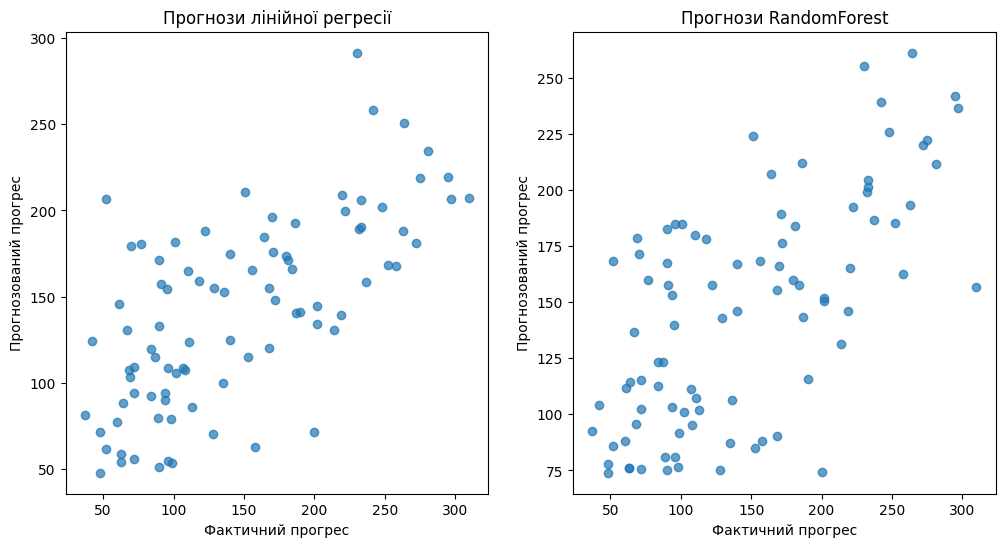

In [ ]:
#Побудувати графіки.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.7)
plt.xlabel('Фактичний прогрес')
plt.ylabel('Прогнозований прогрес')
plt.title('Прогнози лінійної регресії')

# Побудувати графік прогнозів проти фактичних значень для RandomForest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.xlabel('Фактичний прогрес')
plt.ylabel('Прогнозований прогрес')
plt.title('Прогнози RandomForest')

plt.show()

Висновок - У даній роботі провела детальний аналіз датасету. Графіки показали
що жодна модель не є ідеальною, але лінійна регресія показала більш точне передбачення. Лінійна регресія показала кращі результати R² = 0.45 та MSE = 2900.1936 порівняно з RandomForest регресією.

*Завдання* №2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = fetch_california_housing(as_frame=True)
df = data.frame
#Вивести 5 перших рядків.
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#Перевірити наявність пропусків. У разі виявлення замінити на середнє значення.
df.isnull().sum()
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [ ]:
#Перевірити наявність дублікатів, при виявленні - видалити.
duplicates = df.duplicated()
duplicates.sum()

0

In [ ]:
#Вивести унікальні значення.
unique_house_ages = df['HouseAge'].unique()

print("Унікальні значення в стовпчику 'HouseAge':")
print(unique_house_ages)

Унікальні значення в стовпчику 'HouseAge':
[41. 21. 52. 42. 50. 40. 49. 48. 51. 43.  2. 46. 26. 20. 17. 36. 19. 23.
 38. 35. 10. 16. 27. 39. 31. 29. 22. 37. 28. 34. 32. 47. 44. 30. 18. 45.
 33. 24. 15. 14. 13. 25.  5. 12.  6.  8.  9.  7.  3.  4. 11.  1.]


In [ ]:
#Перевірити тип даних.
df.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
MedHouseVal,float64


Кореляції в порядку спадання:
AveRooms     AveBedrms      0.847621
AveBedrms    AveRooms       0.847621
MedHouseVal  MedInc         0.688075
MedInc       MedHouseVal    0.688075
             AveRooms       0.326895
                              ...   
HouseAge     AveRooms      -0.153277
Population   HouseAge      -0.296244
HouseAge     Population    -0.296244
Longitude    Latitude      -0.924664
Latitude     Longitude     -0.924664
Length: 72, dtype: float64


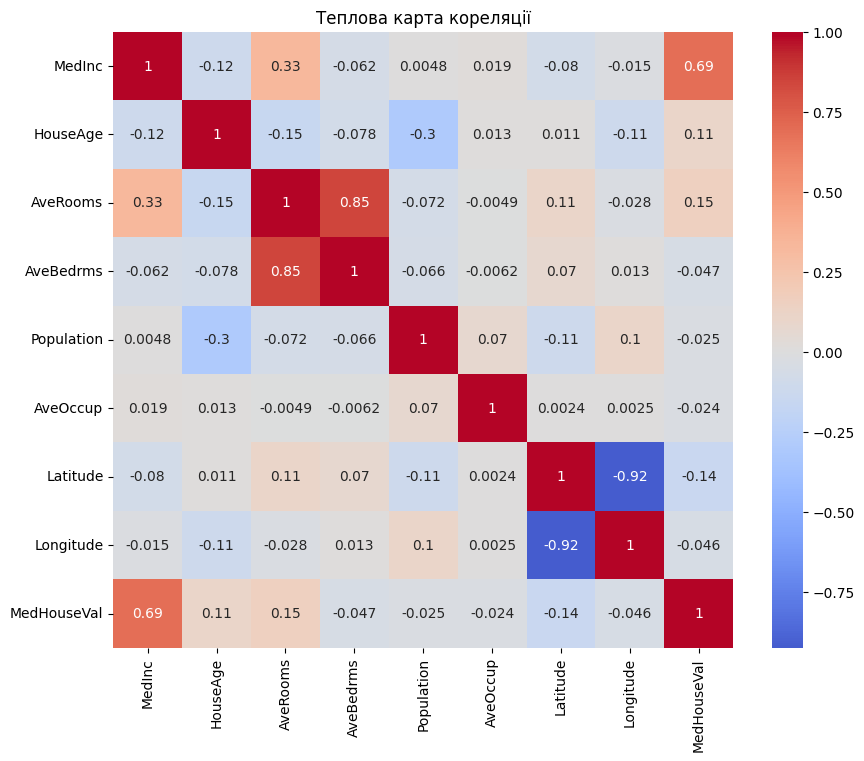

In [ ]:
#Обчислити кореляцію між всіма ознаками. Розташувати в порядку спадання. Побудувати теплову карту кореляції.
correlation_matrix = df.corr()
correlation_sorted = correlation_matrix.unstack().sort_values(ascending=False)
correlation_sorted = correlation_sorted[correlation_sorted != 1.0]

print("Кореляції в порядку спадання:")
print(correlation_sorted)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Теплова карта кореляції")
plt.show()

In [ ]:
#Поділити дані на тренувальні і тестові.
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Розмір тренувального набору:", X_train.shape)
print("Розмір тестового набору:", X_test.shape)

Розмір тренувального набору: (16512, 8)
Розмір тестового набору: (4128, 8)


In [ ]:
#Масштабувати ознаки.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Перші 5 рядків після масштабування (тренувальний набір):")
print(X_train_scaled_df.head())

print("\nПерші 5 рядків після масштабування (тестовий набір):")
print(X_test_scaled_df.head())

Перші 5 рядків після масштабування (тренувальний набір):
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0 -0.326196  0.348490 -0.174916  -0.208365    0.768276  0.051376 -1.372811   
1 -0.035843  1.618118 -0.402835  -0.128530   -0.098901 -0.117362 -0.876696   
2  0.144701 -1.952710  0.088216  -0.257538   -0.449818 -0.032280 -0.460146   
3 -1.017864  0.586545 -0.600015  -0.145156   -0.007434  0.077507 -1.382172   
4 -0.171488  1.142008  0.349007   0.086624   -0.485877 -0.068832  0.532084   

   Longitude  
0   1.272587  
1   0.709162  
2  -0.447603  
3   1.232698  
4  -0.108551  

Перші 5 рядків після масштабування (тестовий набір):
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0 -1.155085 -0.286324 -0.520686  -0.171746   -0.030301  0.067408  0.195100   
1 -0.708659  0.110435 -0.165815   0.223472    0.121851 -0.036030 -0.235491   
2 -0.210402  1.856173 -0.610765   0.205892   -0.102419 -0.149989  1.009478   
3  0.975113 -0.921

In [ ]:
#Побудувати 3 моделі: лін. регресія, регресія випадковий ліс, Ridge. Підібрати оптимальні параметри за допомогою GridSearch.
#Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Регресія випадковий ліс
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Ridge регресія
ridge_reg = Ridge()

param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_ridge_reg = grid_search.best_estimator_
y_pred_ridge = best_ridge_reg.predict(X_test)

Лінійна регресія R²: 0.58
Лінійна регресія MSE: 0.56
Регресія випадковий ліс R²: 0.81
Регресія випадковий ліс MSE: 0.26
Ridge регресія R²: 0.58
Ridge регресія MSE: 0.56


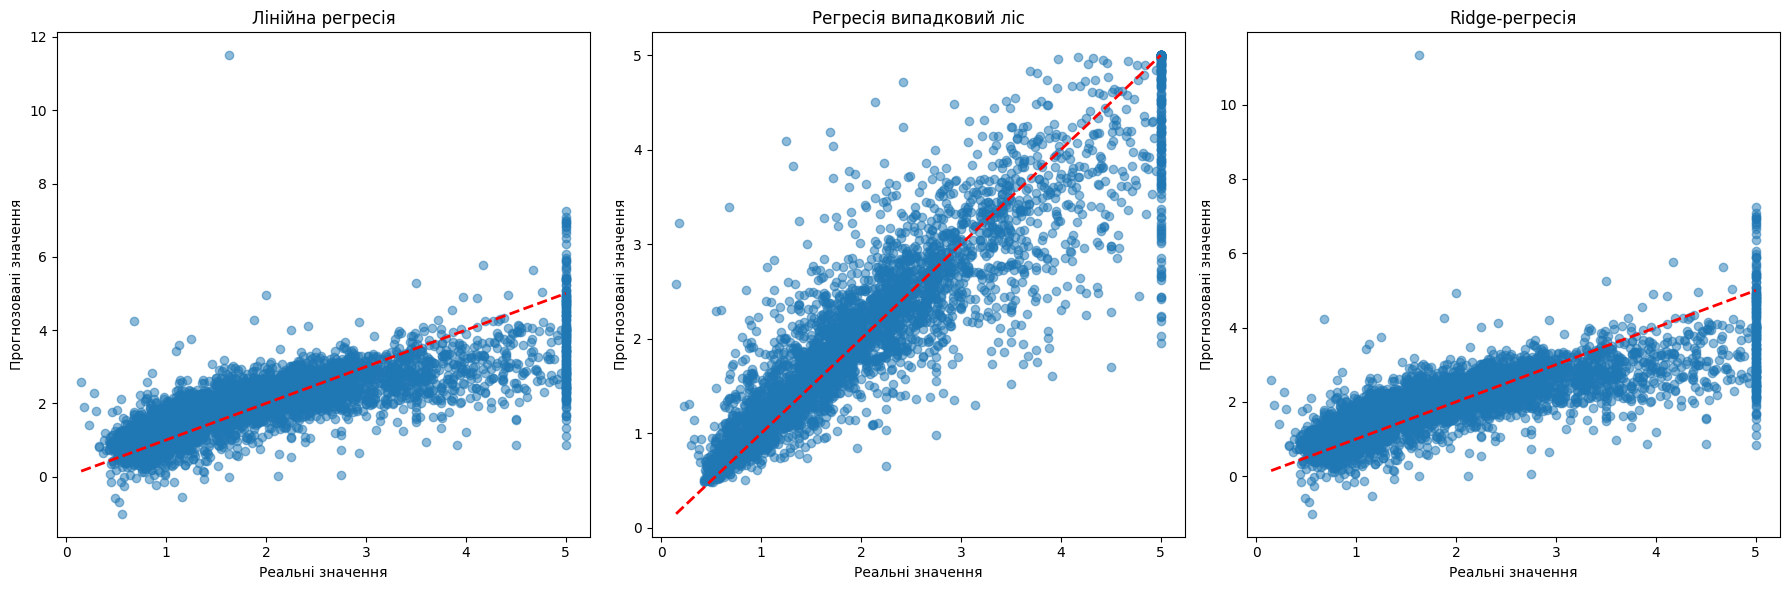

In [ ]:
#Вивести R^2 і MSE. Побудувати графіки.
def print_metrics(y_true, y_pred, model_name):
    print(f"{model_name} R²: {r2_score(y_true, y_pred):.2f}")
    print(f"{model_name} MSE: {mean_squared_error(y_true, y_pred):.2f}")

print_metrics(y_test, y_pred_lin, "Лінійна регресія")
print_metrics(y_test, y_pred_rf, "Регресія випадковий ліс")
print_metrics(y_test, y_pred_ridge, "Ridge регресія")
plt.figure(figsize=(18, 6))

# Графік для Лінійної регресії
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Лінійна регресія')
plt.xlabel('Реальні значення')
plt.ylabel('Прогнозовані значення')

# Графік для Регресії випадковий ліс
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Регресія випадковий ліс')
plt.xlabel('Реальні значення')
plt.ylabel('Прогнозовані значення')

# Графік для Ridge-регресії
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Ridge-регресія')
plt.xlabel('Реальні значення')
plt.ylabel('Прогнозовані значення')

plt.tight_layout()
plt.show()

Висновок: На основі отриманих значень метрик (R² і MSE) було зроблено висновок, що регресія випадкового лісу - це найкраща модель для прогнозування цін на житло в Каліфорнії серед розглянутих, оскільки коефіцієнт 0,81 прямує до 1, середня квадратична похибка (0,26) прямує до 0  
